# **MÓDULO 15 - Exercício**
# Análise  - A segunda etapa da Pré Modelagem

# 1) O primeiro exercício é o de salvar a base que criaram na atividade do módulo anterior em csv e abrir ela neste arquivo.
Igual fizemos no início do módulo atual no início da primeira aula.

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px


In [53]:
df = pd.read_csv("dados_tratados_m14.csv", delimiter = ',')
df.head()


,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,Servico_Telefonico,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,Streaming,Tipo_Contrato,Metodo_Pagamento,Pagamento_Mensal,Total_Pago,Churn
0,female,0,Yes,No,1,No,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,male,0,No,No,34,Yes,DSL,Yes,No,No,One year,Mailed check,56.95,1889.50,No
2,male,0,No,No,2,Yes,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,male,0,No,No,45,No,DSL,Yes,Yes,No,One year,Bank transfer (automatic),71.45,1840.75,No
4,NaN,0,No,No,2,Yes,Fiber optic,No,No,No,Month-to-month,Electronic check,71.45,151.65,Yes


# 2) Comece pela análise univariada:

A) Utilize a função describe no seu dataframe, veja os insights que consegue retirar.

B) Já é possível identificar variáveis com possíveis outliers? Se sim, quais?

C) Plot gráficos que considerar importante para completar sua análise univariada. (Lembrando que sua variável preditora é o churn). Não se esqueça de trazer insights de cada gráfico plotado. Utilize pelo menos 4 variáveis distintas.

D) Verifique se os dados das variáveis Booleanas são balanceados ou não.

In [11]:
df.describe()


,Tempo_como_Cliente,Pagamento_Mensal,Total_Pago
count,2495.000000,2495.000000,2495.000000
mean,32.354309,66.356894,2292.625812
std,24.634007,28.013627,2266.888527
min,0.000000,18.400000,18.800000
25%,8.000000,45.550000,402.175000
50%,29.000000,71.450000,1404.650000
75%,56.000000,87.375000,3874.750000
max,72.000000,118.650000,8564.750000


A média do tempo de permanência dos clientes é de aproximadamente 32, com um desvio padrão de 24, o que indica uma grande variação no tempo que os clientes permanecem com a empresa. O mesmo padrão de variação é observado tanto no pagamento mensal quanto no total pago. No entanto, o total pago apresenta um desvio padrão significativamente maior. Entre os três parâmetros analisados, o pagamento mensal é o que apresenta o menor desvio.

Ao realizar uma análise inicial, podemos supor que o alto desvio do total pago se deve ao fato de que este valor é influenciado tanto pelo tempo de permanência do cliente na empresa quanto pelo seu gasto mensal. Como há possiveis outliers em ambas as variáveis, é possível que um esteja impulsionando o outro, o que contribui para a grande variação no total pago.

Apenas ao analisar a diferença entre o Min e o Q1, e entre o Max e o Q3, poderíamos inicialmente concluir que não há outliers, já que essas distâncias podem parecer equilibradas. No entanto, o alto desvio padrão observado nos dados sugere uma assimetria significativa, o que indica que a distribuição dos valores pode não ser uniforme, isso é um indicativo de que é necessário realizar uma investigação mais detalhada.

In [134]:
df_copyy = df.copy()

# Filtrar os clientes com mais de 4 meses
#clientes_acima_4 = df_copy[df_copy['Tempo_como_Cliente'] > 4]

# Calcular a mediana dos tempos de fidelização acima de 4 meses
#mediana = clientes_acima_4['Tempo_como_Cliente'].mean()

# Substituir os valores abaixo ou iguais a 4 pela mediana no DataFrame copiado
df_copy['Tempo_como_Cliente'] = df_copyy['Tempo_como_Cliente'].apply(lambda x: mediana if x <= 4 else x)
plt.figure(figsize=(10,6))
fig = px.histogram(df_copyy, x='Tempo_como_Cliente', 
                        title='Histograma do Tempo como Cliente',
                        labels={'Frequencia': 'Meses'},
                        )
fig.show()


29.0


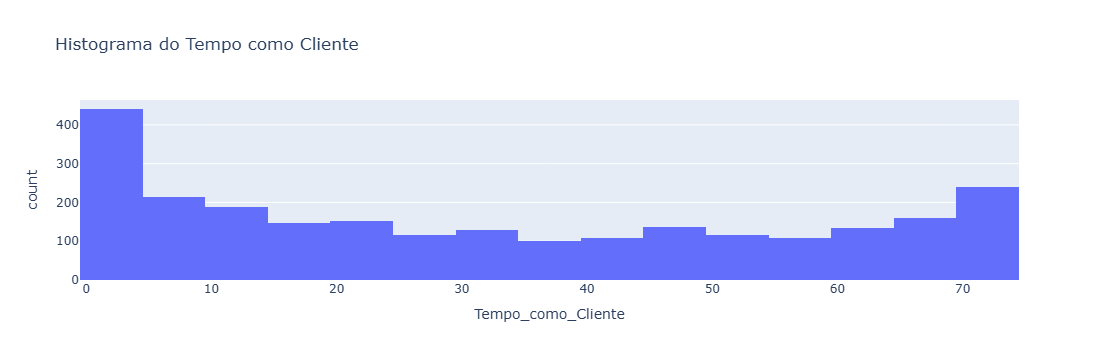

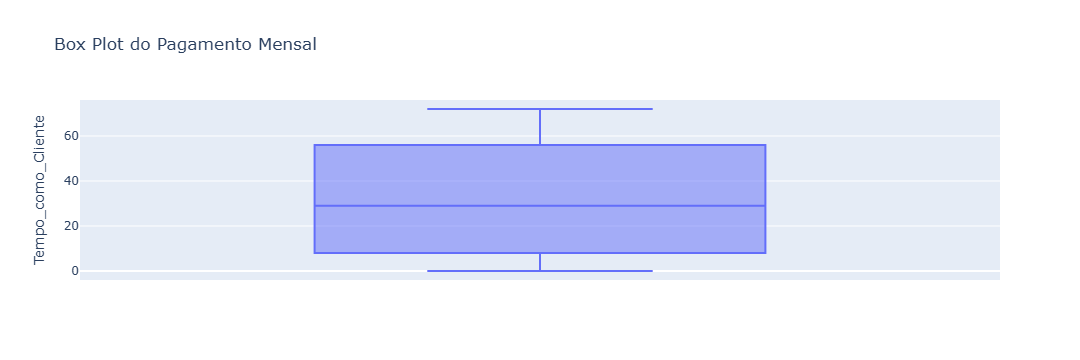

<Figure size 1000x600 with 0 Axes>

In [116]:

plt.figure(figsize=(10,6))
fig = px.histogram(df, x='Tempo_como_Cliente', 
                        title='Histograma do Tempo como Cliente',
                        labels={'Frequencia': 'Meses'},
                        )
fig.show()

fig = px.box(df, y='Tempo_como_Cliente', title='Box Plot do Pagamento Mensal', labels={'Pagamento_Mensal': 'Valores'})
fig.show()







Podemos observar que o whisker superior é um pouco maior que o inferior mas o grafico está relativamente bem distribuido, olhando para histograma podemos observar que há picos no começo do Q1 e final do Q4, o que explica o desvio o padrão ser alto, tirando esses dois picos o restante do histograma está relativamente bem distribuido

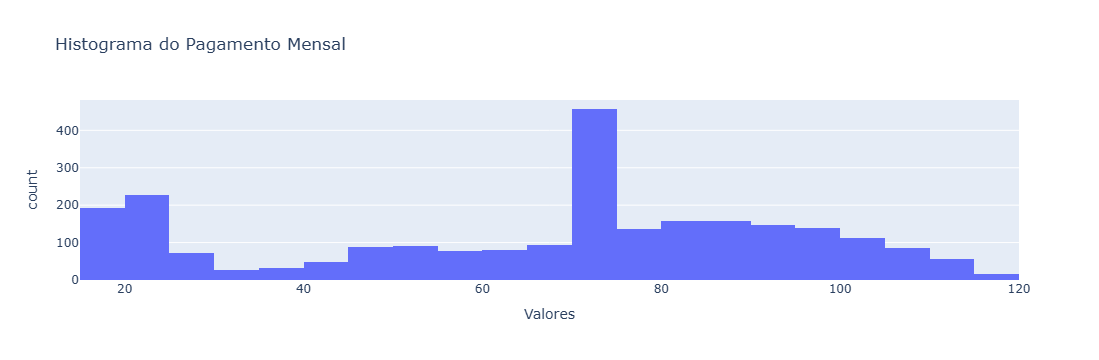

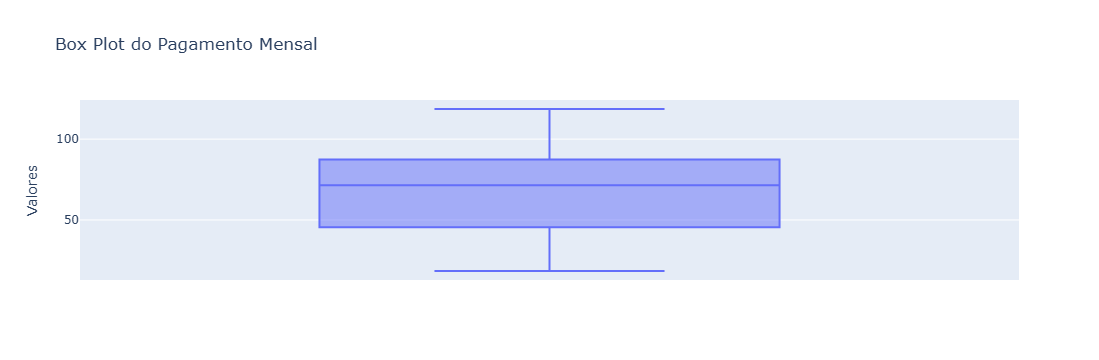

<Figure size 1000x600 with 0 Axes>

In [87]:
plt.figure(figsize=(10,6))
fig = px.histogram(df, x='Pagamento_Mensal', title='Histograma do Pagamento Mensal', labels={'Pagamento_Mensal': 'Valores'})
fig.show()

fig = px.box(df, y='Pagamento_Mensal', title='Box Plot do Pagamento Mensal', labels={'Pagamento_Mensal': 'Valores'})
fig.show()

Podemos observar que há outliers na primeira na primeira metade, tirando esses picos a média da primeira metade é inferior a da segunda e o maior pico está próximo aos 50%, tais outliers fazem com que o boxplat não se comporte de forma precisa

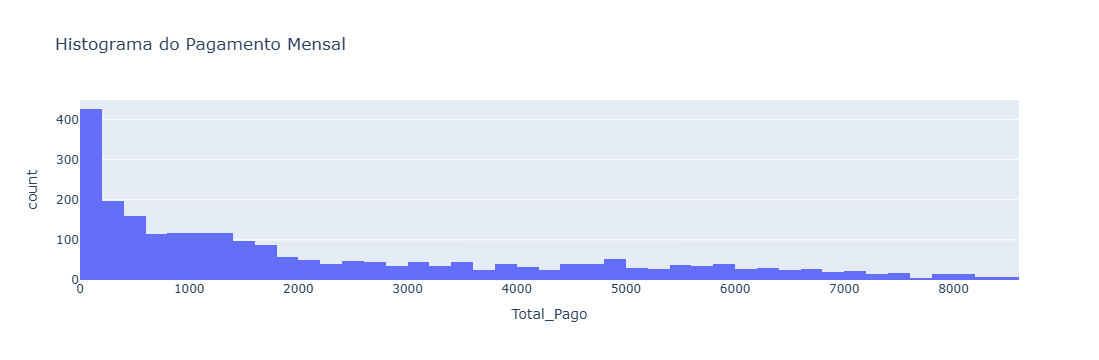

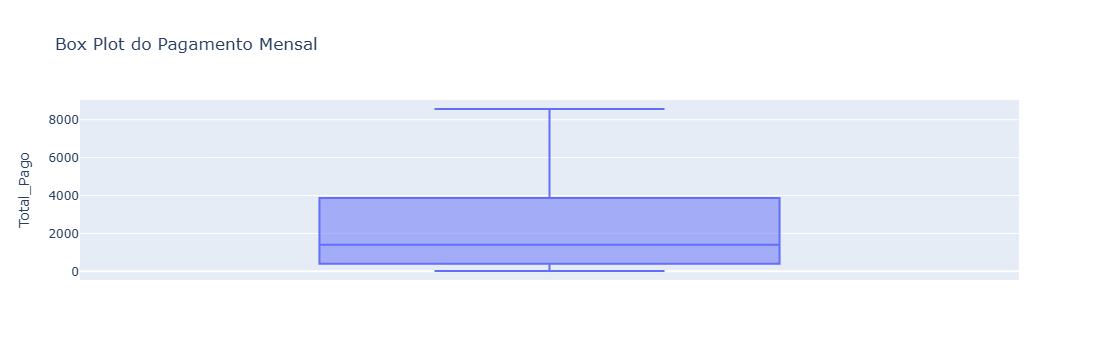

In [89]:

fig = px.histogram(df, x='Total_Pago', title='Histograma do Pagamento Mensal', labels={'Pagamento_Mensal': 'Valores'})
fig.show()

fig = px.box(df, y='Total_Pago', title='Box Plot do Pagamento Mensal', labels={'Pagamento_Mensal': 'Valores'})
fig.show()


No Q1 há um outlier que faz com que o o whisker inferior seja muito menor do que o whisker superior mas mesmo sem ele o histograma ainda estaria tendendo a direita
Está variavel não esta balanceada

Idoso
False    83.887776
True     16.112224
Name: count, dtype: float64


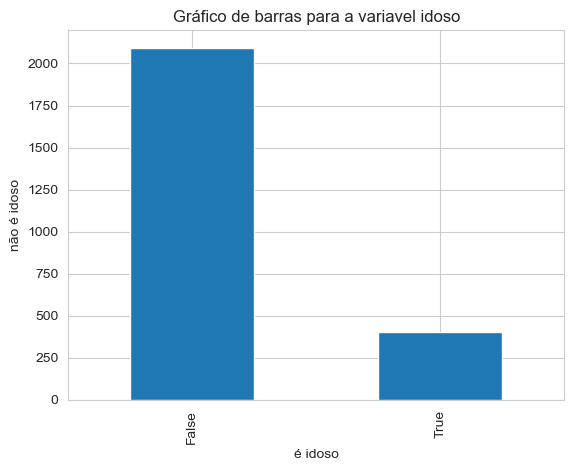

In [75]:
df['Idoso'] = df['Idoso'].astype(bool)
contagem_idoso = df['Idoso'].value_counts()

porcentagem_idoso = (contagem_idoso/contagem_idoso.sum())*100

ax = contagem_idoso.plot(kind='bar') 
plt.title("Gráfico de barras para a variavel idoso") 
plt.xlabel("é idoso") 
plt.ylabel("não é idoso")

print(porcentagem_idoso)

Podemos constatar que a grande maioria dos cliente não são idosos


# 3) Identifique e trate as colunas que contém outliers.
Caso opte por mante-los ou altera-los justifique sua escolha.


In [ ]:
#Seu código aqui

# 4) Realize a etapa da análise bivariada:
A) Questione pelo menos 5 informações e traga as respostas utilizando visuais gráficos e insights.


B) Quais variáveis você acredita serem as mais importantes para esse projetos relacionadas a variável Churn?

In [ ]:
#Seu código aqui